# Plant Disease Detection using CNN


## Importing Libraries and Setting Up Device


In [37]:
import sys
import subprocess
import importlib.util

package_name = 'torchinfo'

if importlib.util.find_spec(package_name) is None:
    print(f"Installing {package_name}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
else:
    print(f"{package_name} is already installed. Skipping.")

torchinfo is already installed. Skipping.


In [38]:
import sys
import subprocess
import importlib.util

package_name = 'torchmetrics'

if importlib.util.find_spec(package_name) is None:
    print(f"Installing {package_name}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
else:
    print(f"{package_name} is already installed. Skipping.")

torchmetrics is already installed. Skipping.


In [39]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchmetrics.classification import Accuracy
from torchinfo import summary
from pathlib import Path
import random
import matplotlib.pyplot as plt
import os
print(f"PyTorch version: {torch.__version__}")
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 2.9.0+cu126
Using device: cuda


## Loading Dataset


In [3]:
import kagglehub

dataset_path = kagglehub.dataset_download('alyeko/potato-tomato-dataset')

print(f"Dataset downloaded to: {dataset_path}")


100%|██████████| 229M/229M [00:06<00:00, 37.8MB/s] 

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1


## Preprocessing Dataset


### Checking file paths


In [4]:
os.listdir('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset')

['test_data', 'ImageDataset']

In [5]:
os.listdir('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset')

['train', 'valid']

In [6]:
os.listdir('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/test_data')

['test']

In [7]:
os.listdir('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/test_data/test')

['tomato_early_383.JPG',
 'potato_early_256.JPG',
 'tomato_late_265.JPG',
 'tomato_late_822.JPG',
 'tomato_early_339.JPG',
 'potato_late_277.JPG',
 'potato_late_273.JPG',
 'tomato_healthy_197.JPG',
 'tomato_healthy_129.JPG',
 'tomato_late_783.JPG',
 'tomato_late_794.JPG',
 'tomato_early_363.JPG',
 'tomato_healthy_333.JPG',
 'tomato_early_49.JPG',
 'potato_early_34.JPG',
 'potato_late_405.JPG',
 'tomato_late_790.JPG',
 'tomato_late_168.JPG',
 'tomato_healthy_325.JPG',
 'tomato_early_381.JPG',
 'potato_late_9.JPG',
 'tomato_late_839.JPG',
 'tomato_early_73.JPG',
 'tomato_healthy_19.JPG',
 'potato_late_327.JPG',
 'potato_late_391.JPG',
 'potato_late_59.JPG',
 'tomato_late_343.JPG',
 'potato_early_378.JPG',
 'tomato_late_821.JPG',
 'tomato_late_360.JPG',
 'tomato_early_3.JPG',
 'potato_late_49.JPG',
 'tomato_late_51.JPG',
 'potato_late_139.JPG',
 'potato_early_8.JPG',
 'tomato_late_248.JPG',
 'tomato_healthy_51.JPG',
 'potato_late_83.JPG',
 'tomato_early_63.JPG',
 'potato_late_25.JPG',
 'p

In [8]:
path = Path('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train')

In [9]:
os.listdir('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train')

['tomato_late',
 'potato_late',
 'potato_healthy',
 'tomato_healthy',
 'potato_early',
 'tomato_early']

In [10]:
os.listdir('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train/potato_early')

['potato_early_768.JPG',
 'potato_early_1074_ccrp_1.JPG',
 'potato_early_71.JPG',
 'potato_early_1008_ccrp_3.JPG',
 'potato_early_1047_ccrp_1.JPG',
 'potato_early_1001_ccrp_1.JPG',
 'potato_early_991.JPG',
 'potato_early_1055_ccrp_3.JPG',
 'potato_early_1142_ccrp_4.JPG',
 'potato_early_1090_ccrp_2.JPG',
 'potato_early_640.JPG',
 'potato_early_1034_gblr_4.JPG',
 'potato_early_917.JPG',
 'potato_early_1036_ccrp_2.JPG',
 'potato_early_784.JPG',
 'potato_early_798.JPG',
 'potato_early_889.JPG',
 'potato_early_1009_gblr_3.JPG',
 'potato_early_1061_ccrp_2.JPG',
 'potato_early_1006_ccrp_1.JPG',
 'potato_early_1037_gblr_1.JPG',
 'potato_early_1030_gblr_4.JPG',
 'potato_early_263.JPG',
 'potato_early_1132_gblr_1.JPG',
 'potato_early_1049_gblr_4.JPG',
 'potato_early_1094_ccrp_4.JPG',
 'potato_early_1113_gblr_4.JPG',
 'potato_early_1112_gblr_3.JPG',
 'potato_early_808.JPG',
 'potato_early_953.JPG',
 'potato_early_1090_rrot_1.JPG',
 'potato_early_1156_rrot_1.JPG',
 'potato_early_1014_ccrp_2.JPG',


In [11]:
path = '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/valid'
print(os.listdir(path))

['tomato_late', 'potato_late', 'potato_healthy', 'tomato_healthy', 'potato_early', 'tomato_early']


### Counting number of files in dataset


In [17]:
# count number of files in path
num_files = len(list(path.glob('*/*.*')))
# count files in each subdirectory

dir_list = ['potato_early','potato_late', 'tomato_healthy', 'potato_healthy', 'tomato_early', 'tomato_late']
for direct in dir_list:
    s = 0
    for i in (Path(path)/direct).iterdir():
        s+=1
    print(f"{direct}: {s}")

potato_early: 1998
potato_late: 1998
tomato_healthy: 2003
potato_healthy: 2008
tomato_early: 1998
tomato_late: 2004


In [18]:
num_files

12009

### Defining Transform


In [19]:
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

### Creating Datasets with Transforms


In [20]:
train_path = '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train'

valid_path = '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/valid'

train_data = datasets.ImageFolder(root=train_path, transform=transforms)
valid_data = datasets.ImageFolder(root=valid_path, transform=transforms)

### Train data Classes


In [21]:
train_data.class_to_idx

{'potato_early': 0,
 'potato_healthy': 1,
 'potato_late': 2,
 'tomato_early': 3,
 'tomato_healthy': 4,
 'tomato_late': 5}

### Validation data Classes


In [22]:
valid_data.class_to_idx

{'potato_early': 0,
 'potato_healthy': 1,
 'potato_late': 2,
 'tomato_early': 3,
 'tomato_healthy': 4,
 'tomato_late': 5}

In [23]:
len(train_data)

12009

In [24]:
len(valid_data)

1331

### Plotting Random Images from Train Dataset


Random number: 2397
Image shape: torch.Size([3, 224, 224])
Label: 1


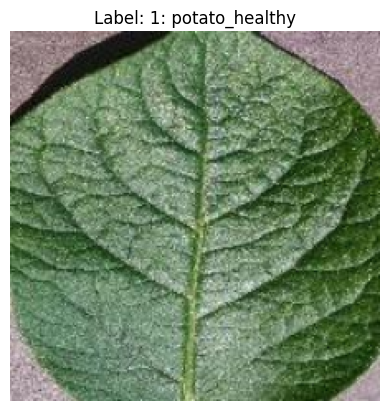

In [25]:
# write code to get the first image and label from the training
random_number = random.randint(0, len(train_data)-1)
print(f"Random number: {random_number}")
image, label = train_data[random_number]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
import matplotlib.pyplot as plt
# write code to plot the first image from the training data
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {label}: {train_data.classes[label]}")
plt.axis("off")
plt.show()

### Plotting Random Images from Validation Dataset


Random number: 803
Image shape: torch.Size([3, 224, 224])
Label: 3


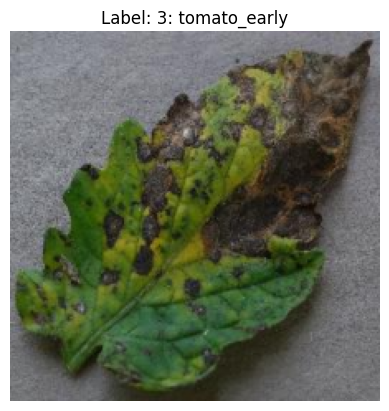

In [ ]:
# write code to get the first image and label from the training
random_number = random.randint(0, len(valid_data)-1)
print(f"Random number: {random_number}")
image, label = valid_data[random_number]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")

# write code to plot the first image from the validation data
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {label}: {valid_data.classes[label]}")
plt.axis("off")
plt.show()

### Defining Dataloaders


In [27]:

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
valid_dataloader = DataLoader(valid_data, batch_size=32, shuffle=False, num_workers=2)

## Model


### Crearing Model Class


In [28]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        # convolutional layers
        self.feature_extraction = nn.Sequential(
            # first layer
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
            
            # second layer
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),

            # third layer
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # fully connected layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(out_features=256), nn.ReLU(), nn.Dropout(p=0.4),
            
            nn.Linear(in_features=256, out_features=128), nn.ReLU(), nn.Dropout(p=0.2),

            nn.Linear(in_features=128, out_features=6)
        )

    def forward(self, x):
        x = self.feature_extraction(x)
        x = self.classifier(x)
        return x

In [29]:
model = Model().to(device)
print(model)

Model(
  (feature_extraction): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): LazyLinear(in_features=0, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=6, bias=True)
  )
)


In [30]:
summary(model, input_size=(32, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [32, 6]                   --
├─Sequential: 1-1                        [32, 128, 28, 28]         --
│    └─Conv2d: 2-1                       [32, 32, 224, 224]        896
│    └─ReLU: 2-2                         [32, 32, 224, 224]        --
│    └─MaxPool2d: 2-3                    [32, 32, 112, 112]        --
│    └─Conv2d: 2-4                       [32, 64, 112, 112]        18,496
│    └─ReLU: 2-5                         [32, 64, 112, 112]        --
│    └─MaxPool2d: 2-6                    [32, 64, 56, 56]          --
│    └─Conv2d: 2-7                       [32, 128, 56, 56]         73,856
│    └─ReLU: 2-8                         [32, 128, 56, 56]         --
│    └─MaxPool2d: 2-9                    [32, 128, 28, 28]         --
├─Sequential: 1-2                        [32, 6]                   --
│    └─Flatten: 2-10                     [32, 100352]              --
│    └

In [31]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [32]:
train_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 12009
    Root location: /root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

### Training Loop


In [33]:
epochs = 10

for epoch in range(epochs):

    train_loss = 0.0

    for images, labels in train_dataloader:
        # move data to device
        images, labels = images.to(device), labels.to(device)
        # clear gradients
        optimizer.zero_grad()
        # forward pass
        outputs = model(images)
        # loss calculation
        loss = criterion(outputs, labels)
        # backward pass
        loss.backward()
        # update weights
        optimizer.step()
        # accumulate loss
        train_loss += loss.item() * images.size(0)

    # calculate average loss for the epoch
    train_loss /= len(train_dataloader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")


Epoch 1/10, Training Loss: 1.0606
Epoch 2/10, Training Loss: 0.5132
Epoch 3/10, Training Loss: 0.3293
Epoch 4/10, Training Loss: 0.2619
Epoch 5/10, Training Loss: 0.2056
Epoch 6/10, Training Loss: 0.1646
Epoch 7/10, Training Loss: 0.1451
Epoch 8/10, Training Loss: 0.1141
Epoch 9/10, Training Loss: 0.1108
Epoch 10/10, Training Loss: 0.1155


### Evaluation Loop


In [41]:


accuracy_metric = Accuracy(task='multiclass', num_classes=6).to(device)

model.eval()

with torch.no_grad():

    for images, labels in valid_dataloader:

        images, labels = images.to(device), labels.to(device)

        y_pred = model(images)

        accuracy_metric(y_pred, labels)

    final_accuracy = accuracy_metric.compute()
    print(f"Accuracy on Test Data : {final_accuracy.item() * 100:.2f}%")

    accuracy_metric.reset()

Accuracy on Test Data : 89.86%


In [ ]:
accuracy_metric = Accuracy(task='multiclass', num_classes=6).to(device)

model.eval()

with torch.no_grad():

    for images, labels in train_dataloader:

        images, labels = images.to(device), labels.to(device)

        y_pred = model(images)

        accuracy_metric(y_pred, labels)

    final_accuracy = accuracy_metric.compute()
    print(f"Accuracy on Train Data : {final_accuracy.item() * 100:.2f}%")

    accuracy_metric.reset()

Accuracy on Train Data : 98.79%
